* https://rabadan.c2b2.columbia.edu/html/randomly/tutorial.html#refs

In [ ]:
!pip install randomly

In [ ]:
import randomly
import matplotlib.pyplot as plt

In [ ]:
import pandas as pd
df=pd.read_table('/content/drive/My Drive/Colab Notebooks/example.txt',index_col=0)

In [ ]:
df

,A1BG,A1CF,A2M,A4GALT,AAAS,AACS,AACSP1,AADAC,AADACL2,AADACP1,AADAT,AAED1,AAGAB,AAK1,AAMDC,AAMP,AANAT,AAR2,AARD,AARS,AARS2,AARSD1,AASDH,AASDHPPT,AASS,AATF,AATK,ABAT,ABCA1,ABCA10,ABCA11P,ABCA12,ABCA13,ABCA17P,ABCA2,ABCA3,ABCA4,ABCA5,ABCA6,ABCA7,...,ZRANB3,ZRSR1,ZRSR2,ZSCAN1,ZSCAN12,ZSCAN12P1,ZSCAN16,ZSCAN18,ZSCAN2,ZSCAN20,ZSCAN21,ZSCAN22,ZSCAN25,ZSCAN26,ZSCAN29,ZSCAN30,ZSCAN31,ZSCAN32,ZSCAN4,ZSCAN5A,ZSCAN9,ZSWIM1,ZSWIM2,ZSWIM3,ZSWIM4,ZSWIM5,ZSWIM7,ZSWIM8,ZUFSP,ZW10,ZWILCH,ZWINT,ZXDA,ZXDB,ZXDC,ZYG11B,ZYX,ZZEF1,ZZZ3,pk
0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1
1,0,1,0,0,0,2,0,13,0,0,0,2,0,1,0,0,0,0,0,2,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,...,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,4,0,0,0,0,0,2,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,1,0,0,0,0,0,0,1,0,2,0,0,1
3,0,0,0,0,0,1,0,1,0,0,1,0,0,2,0,2,0,0,0,0,0,0,0,0,0,3,0,1,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,1,1,0,0,1
4,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1
1455,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,3,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1456,0,0,2,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
1457,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0


In [ ]:
data_PPY=df["PPY"]
data_PPY.describe()

count    1459.000000
mean       28.067855
std       155.207013
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max      1961.000000
Name: PPY, dtype: float64

(array([1.406e+03, 5.000e+00, 1.600e+01, 1.200e+01, 1.100e+01, 3.000e+00,
        3.000e+00, 1.000e+00, 1.000e+00, 1.000e+00]),
 array([   0. ,  196.1,  392.2,  588.3,  784.4,  980.5, 1176.6, 1372.7,
        1568.8, 1764.9, 1961. ]),
 <a list of 10 Patch objects>)

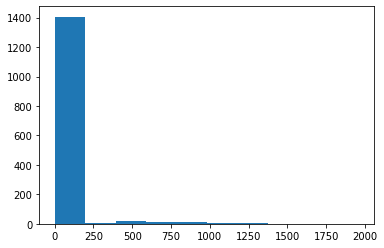

In [ ]:
plt.hist(data_PPY)

In [ ]:
data=df.values
data.shape

(1459, 17287)

In [ ]:
d=data.dot(data.T)
d.shape

(1459, 1459)

In [ ]:
import numpy as np
import numpy.linalg as LA 
w, v=LA.eig(d)

In [ ]:
w.max()

1259198147.563816

In [ ]:
w

array([1.25919815e+09, 1.09719333e+09, 8.16193362e+07, ...,
       2.26808714e+03, 2.25911403e+03, 2.28898608e+03])

(array([1.457e+03, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 1.000e+00, 1.000e+00]),
 array([1.02804141e+03, 1.25920740e+08, 2.51840452e+08, 3.77760164e+08,
        5.03679876e+08, 6.29599588e+08, 7.55519300e+08, 8.81439012e+08,
        1.00735872e+09, 1.13327844e+09, 1.25919815e+09]),
 <a list of 10 Patch objects>)

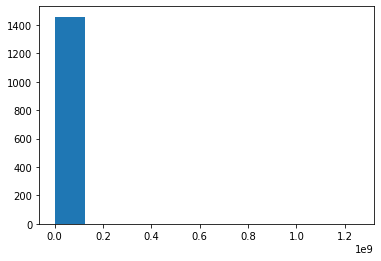

In [ ]:
plt.hist(w)

In [ ]:
model = randomly.Rm()

In [ ]:
model.preprocess(df, min_tp=0, 
                            min_genes_per_cell=0, 
                            min_cells_per_gene=0,
                        refined=True)

Run the refining function


In [ ]:
model.refining(min_trans_per_gene=7)

1459  cells and  11389  genes


## Modeling the data using Random Matrix Theory

In [ ]:
model.fit()

Preprocessed data is being used for fitting


* 1416個の固有値はノイズ

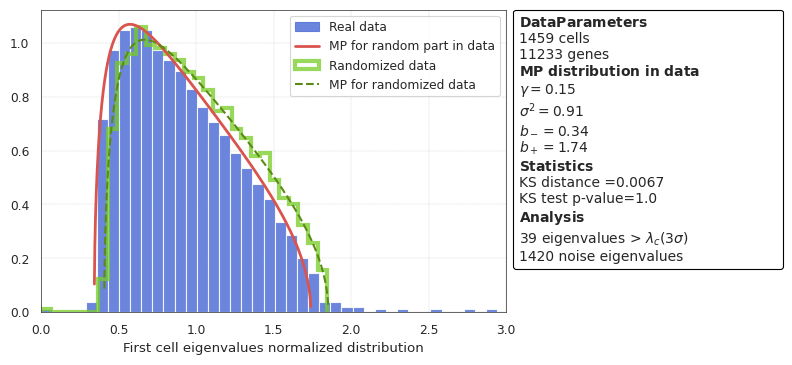

In [ ]:
model.plot_mp()

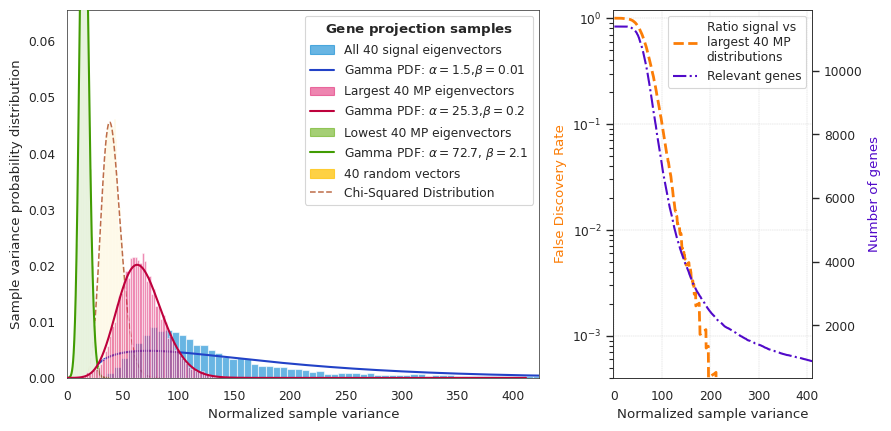

In [ ]:
model.plot_statistics()

* 偽発見率 false discovery rate / 偽陽性

In [ ]:
df2 = model.return_cleaned(fdr=0.0001)
df2.shape

(1459, 2213)

In [ ]:
df2 = model.return_cleaned(sample_variance=450)
df2.shape

(1459, 758)

In [ ]:
df2 = model.return_cleaned(sample_variance=50, path='/content/drive/My Drive/Colab Notebooks/example.txt')

In [ ]:
model.fit_tsne(sample_variance=350)

computing t-SNE, using Multicore t-SNE for 2 jobs
atribute embedding is updated with t-SNE coordinates


* https://github.com/DmitryUlyanov/Multicore-TSNE

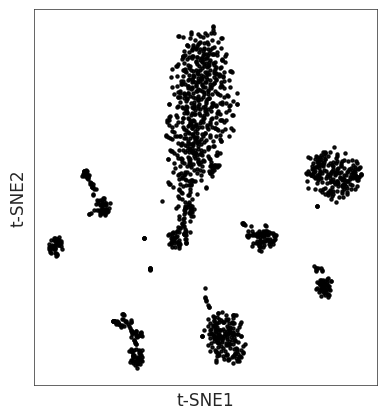

In [ ]:
model.plot()

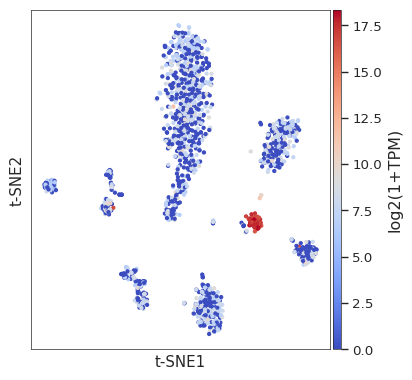

In [ ]:
model.plot(gene=['PPY'], size=4)

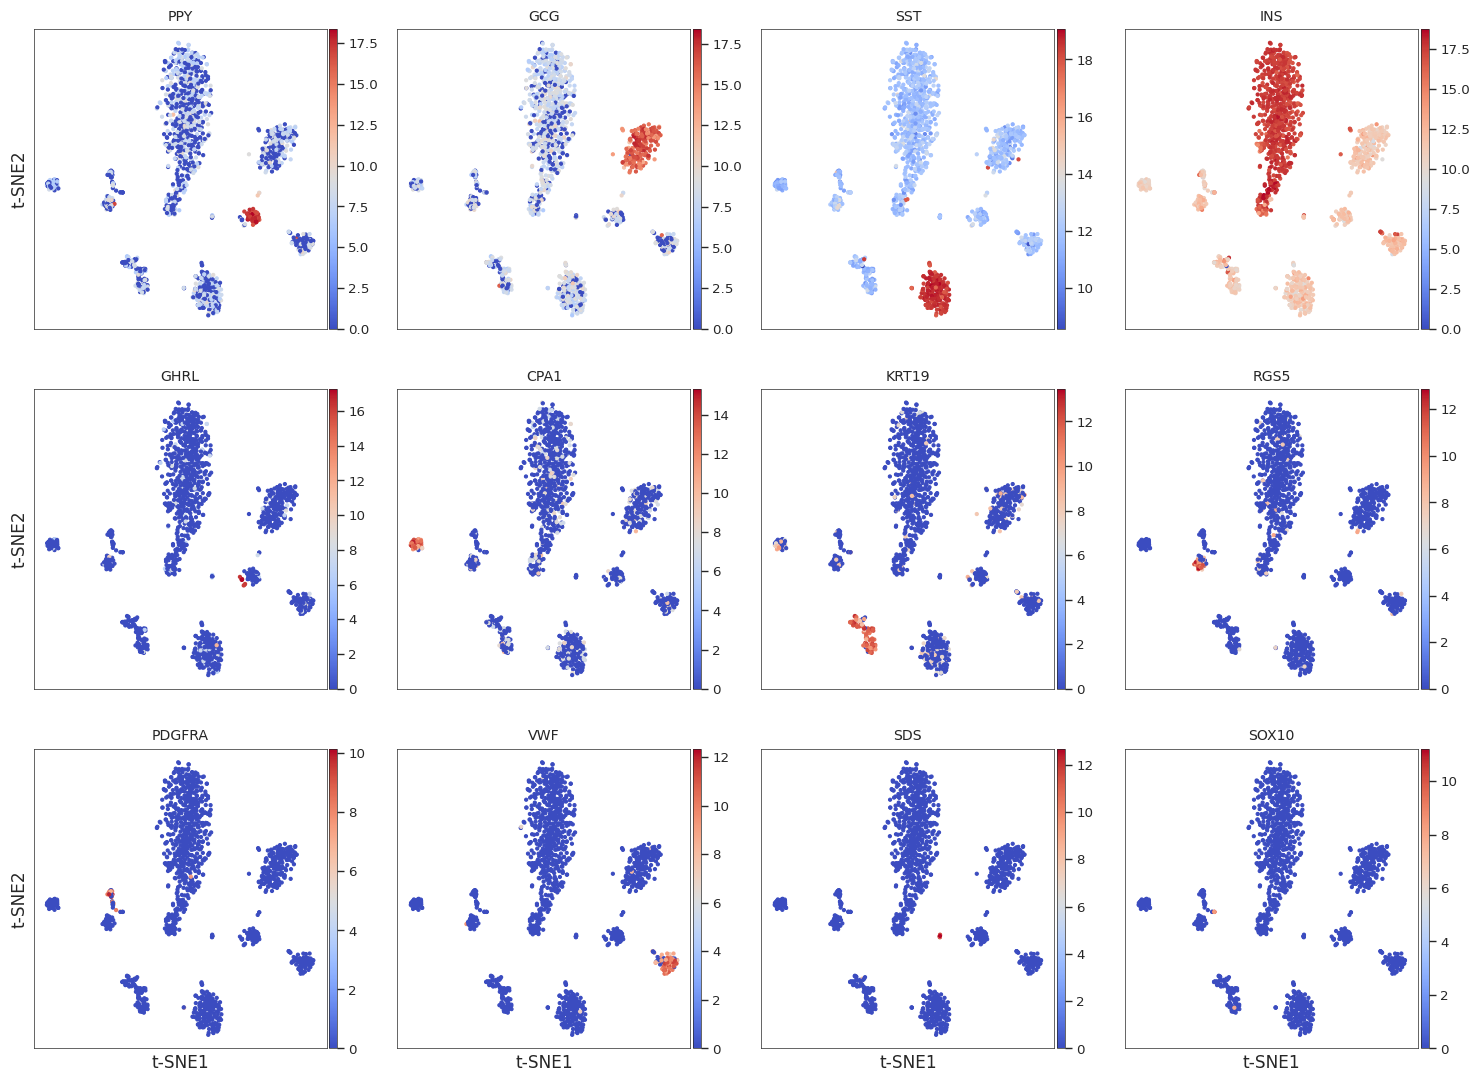

In [ ]:
model.plot(gene=('PPY','GCG','SST','INS','GHRL','CPA1','KRT19'
                                    ,'RGS5','PDGFRA','VWF','SDS','SOX10'))

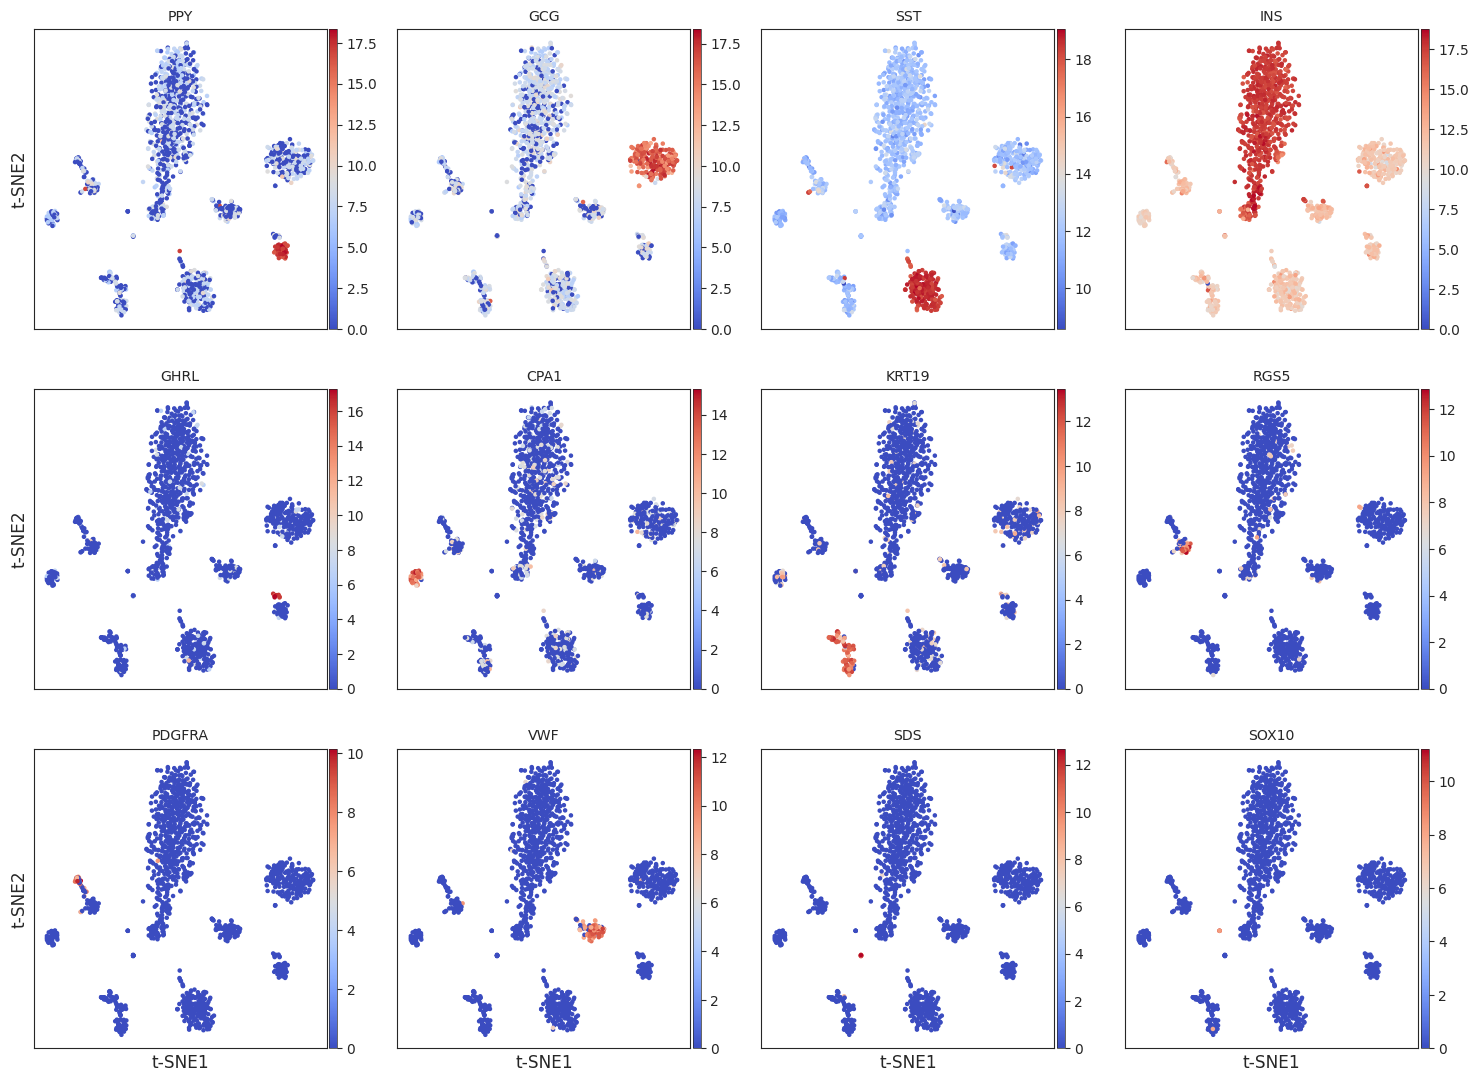

In [ ]:
model.plot(gene=('PPY','GCG','SST','INS','GHRL','CPA1','KRT19'
                                    ,'RGS5','PDGFRA','VWF','SDS','SOX10'))

In [ ]:
model.fit_tsne(sample_variance=400)
model.plot(gene=('PPY','GCG','SST','INS'))

computing t-SNE, using Multicore t-SNE for 2 jobs


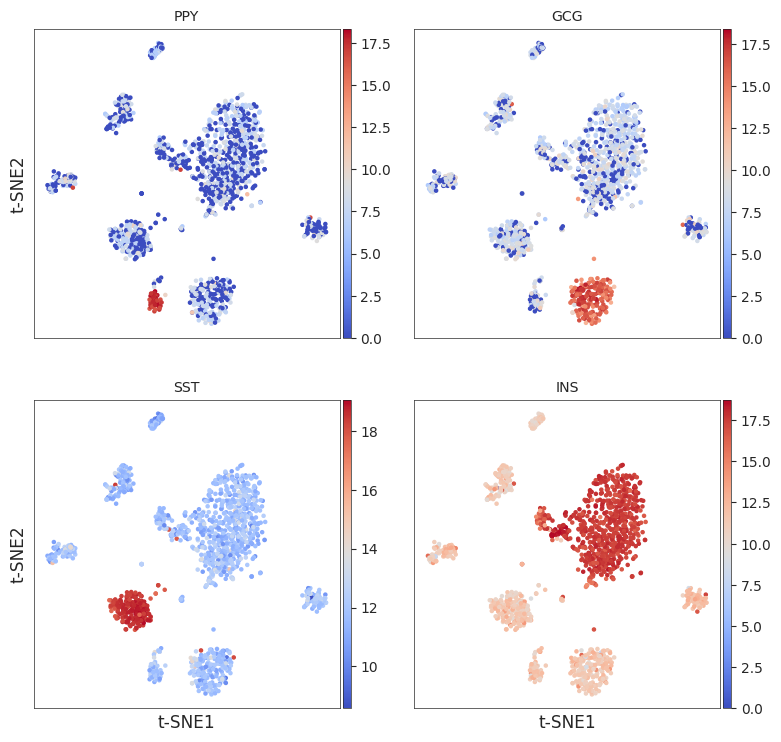